https://www.kaggle.com/code/parsasam/reinforcement-learning-notes-multi-armed-bandits

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached numpy-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB

In [2]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
k = 10
num_problems = 2000

q_star = np.random.normal(0, 1, (num_problems,k))
arms = [0] * k

for i in range(10):
    arms[i] = np.random.normal(q_star[0, i], 1, 2000) # first problem as a sample


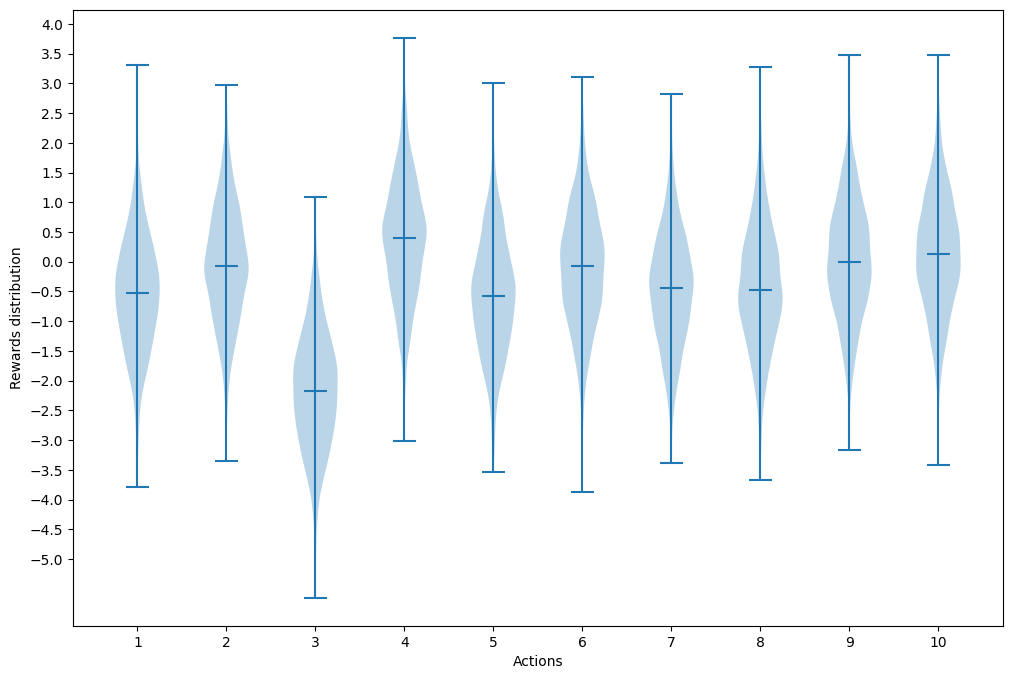

In [5]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))

plt.violinplot(arms, positions=range(1,11), showmedians=True)
plt.show()

In [6]:
def bandit(action, problem):
    return np.random.normal(q_star[problem, action], 1)

In [7]:
def simple_max(Q, N, t):
#     return np.argmax(Q)
    return np.random.choice(np.flatnonzero(Q == Q.max())) # breaking ties randomly

In [8]:
def simple_bandit(k, epsilon, steps, initial_Q, alpha=0, argmax_func=simple_max):
    #READ THE ALGORITHM CAREFULLY AND WRITE THE CODE HERE
    # Step:1  Initialization: Create arrays to track rewards and optimal action counts, both starting at zero; repeat the following for each problem.
    # Step:2 Set up problem: Initialize estimated values for all actions to the starting value and action counts to zero; identify the best possible action.
    # Step:3 Exploration: Randomly choose an action with a probability determined by the exploration rate.
    # Step:4 Exploitation: Choose the action with the highest estimated value if not exploring.
    # Step:5 Simulate reward: Execute the chosen action and receive the corresponding reward from the bandit.
    # Step:6 Update action counts: Increase the count of times the chosen action has been selected.
    # Step:7 Update estimated values: Adjust the estimated value for the chosen action based on the new reward.
    # Step:8 Track performance: Add the reward to the total rewards for that step and increment the count of optimal actions if the best action was chosen.
    # Step:9 Compute averages: After all problems, calculate the average rewards and average optimal action counts across all problems.

    rewards = np.zeros(steps)
    actions = np.zeros(steps)

    for i in tqdm(range(num_problems)):
        Q = np.ones(k) * initial_Q # initial Q
        N = np.zeros(k)  # initalize number of rewards given
        best_action = np.argmax(q_star[i])
        for t in range(steps):
            if np.random.rand() < epsilon: # explore
                a = np.random.randint(k)
            else: # exploit
                a = argmax_func(Q, N, t)

            reward = bandit(a, i)

            N[a] += 1
            if alpha > 0:
                Q[a] = Q[a] + (reward - Q[a]) * alpha
            else:
                Q[a] = Q[a] + (reward - Q[a]) / N[a]

            rewards[t] += reward

            if a == best_action:
                actions[t] += 1

    return np.divide(rewards,num_problems), np.divide(actions,num_problems)


In [9]:
ep_0, ac_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0)
ep_01, ac_01 = simple_bandit(k=10, epsilon=0.01, steps=1000, initial_Q=0)
ep_1, ac_1 = simple_bandit(k=10, epsilon=0.1, steps=1000, initial_Q=0)

100%|██████████| 2000/2000 [00:50<00:00, 39.72it/s]


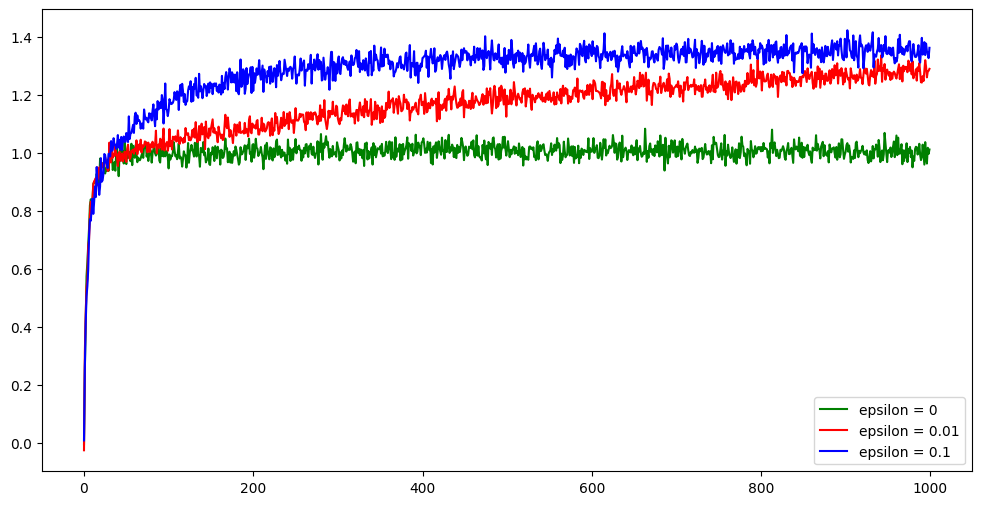

In [10]:

plt.figure(figsize=(12,6))
plt.plot(ep_0, 'g', label='epsilon = 0')
plt.plot(ep_01, 'r', label='epsilon = 0.01')
plt.plot(ep_1, 'b', label='epsilon = 0.1')
plt.legend()
plt.show()

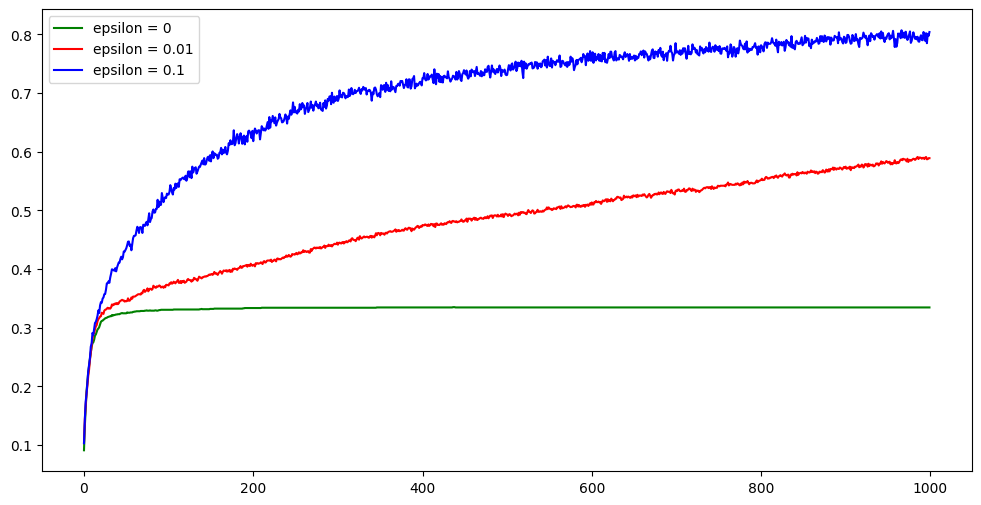

In [11]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,1,0.1))
plt.plot(ac_0, 'g', label='epsilon = 0')
plt.plot(ac_01, 'r', label='epsilon = 0.01')
plt.plot(ac_1, 'b', label='epsilon = 0.1')
plt.legend()
plt.show()

In [12]:
opt_0, ac_opt_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=5, alpha=0.2)


100%|██████████| 2000/2000 [00:53<00:00, 37.38it/s]


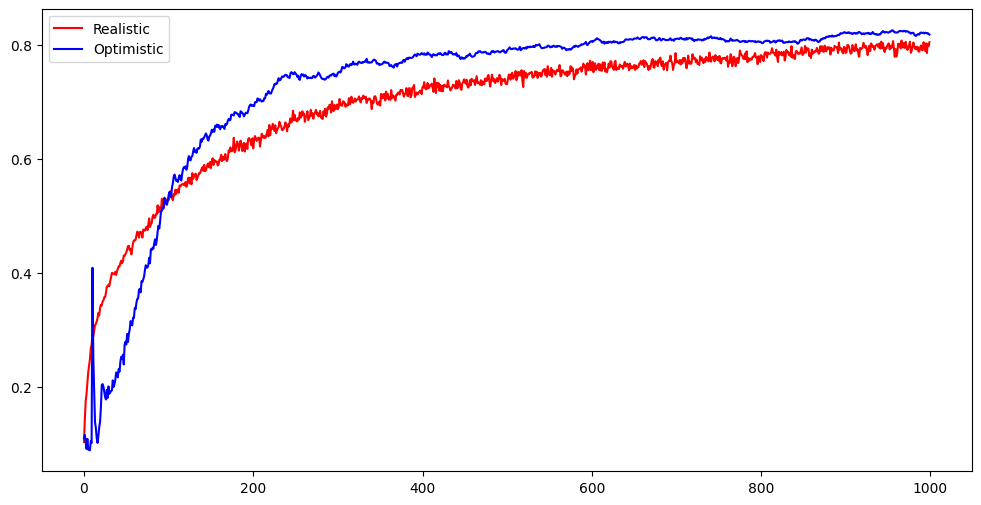

In [13]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,3,0.2))
plt.plot(ac_1, 'r', label='Realistic')
plt.plot(ac_opt_0, 'b', label='Optimistic')
plt.legend()
plt.show()

In [14]:

def ucb(Q, N, t):
    #READ THE ALGORITHM CAREFULLY AND WRITE THE CODE HERE
    #Step: 1 Set exploration constant: Define a constant that balances exploration and exploitation.
    #Step: 2 Handle unvisited actions: If any action has not been selected yet, randomly pick one of those actions.
    #Step: 3 Compute confidence bounds: For each action, calculate a value that combines its estimated value and a measure of uncertainty based on how often it has been selected and the current time step.
    #Step: 4 Select best action: Identify the action with the highest confidence bound, resolving ties randomly.

    c = 2
    if N.min() == 0:
        return np.random.choice(np.flatnonzero(N == N.min()))

    M = Q + c * np.sqrt(np.divide(np.log(t),N))
    return np.argmax(M) # breaking ties randomly

In [15]:
ucb_2, ac_ucb_2 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0, argmax_func=ucb)

100%|██████████| 2000/2000 [00:36<00:00, 54.87it/s]


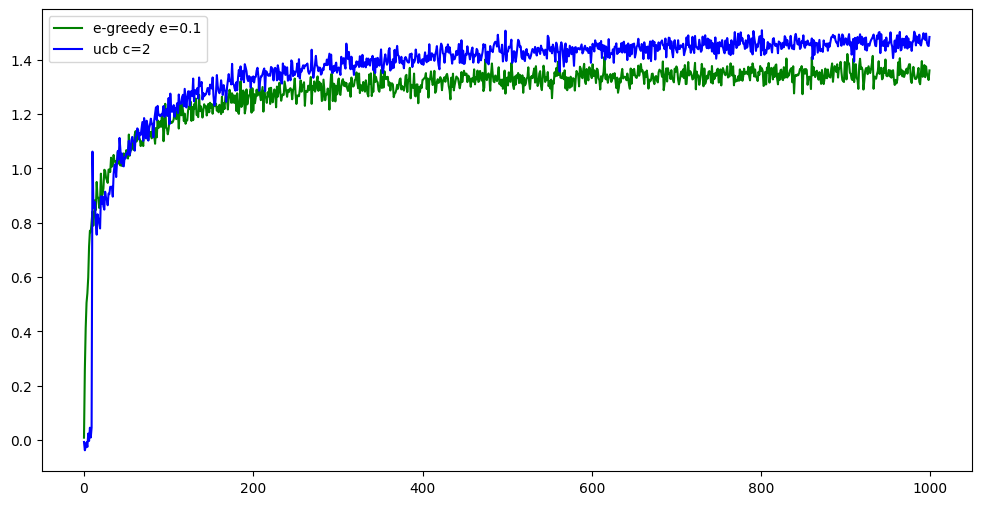

In [16]:
plt.figure(figsize=(12,6))
plt.plot(ep_1, 'g', label='e-greedy e=0.1')
plt.plot(ucb_2, 'b', label='ucb c=2')
plt.legend()
plt.show()

In [17]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    M = e_x / e_x.sum()
    return np.argmax(M), M

In [18]:
def gradient_bandit(k, steps, alpha, initial_Q, is_baseline=True):
   #READ THE ALGORITHM CAREFULLY AND WRITE THE CODE HERE
    #Step: 1 Initialize arrays: Create arrays for rewards, optimal actions, action preferences, and estimated values, all set to initial values.
    #Step: 2 Set up problem: For each problem, reset preferences, estimated values, and the baseline; identify the best action.
    #Step: 3 Select action: Use the softmax policy to calculate probabilities and randomly pick an action.
    #Step: 4 Simulate reward: Execute the chosen action and receive a reward from the environment.
    #Step: 5 Update action values: Adjust the estimated value for the chosen action based on the reward.
    #Step: 6 Update preferences: Increase the preference for the chosen action and decrease preferences for others based on their probabilities.
    #Step: 7 Update baseline: If enabled, update the baseline reward estimate for the chosen action.
    #Step: 8 Track performance: Add the reward to the cumulative rewards and increment optimal action counts if the best action was selected.
    #Step: 9 Compute averages: Calculate average rewards and optimal action counts over all problems.
    rewards = np.zeros(steps)
    actions = np.zeros(steps)

    for i in tqdm(range(num_problems)):
        Q = np.ones(k) * initial_Q # initial Q
        N = np.zeros(k) # initalize number of rewards given
        R = np.zeros(k)
        H = np.zeros(k) # initalize preferences
        pi = np.zeros(k)
        best_action = np.argmax(q_star[i]) # best action of i'th problem

        for t in range(steps):
            a, pi = softmax(H)

            reward = bandit(a, i)

            N[a] += 1
            Q[a] = Q[a] + (reward - Q[a]) / N[a]

            for action_i in range(k):
                if action_i == a :
                    H[a] = H[a] + alpha * (reward - R[a]) * (1 - pi[a])
                else:
                    H[action_i] = H[action_i] - alpha * (reward - R[action_i]) * pi[action_i]

            if is_baseline == True:
                R[a] = Q[a]

            rewards[t] += reward
            if a == best_action:
                actions[t] += 1

    return np.divide(rewards,num_problems), np.divide(actions,num_problems)


In [19]:
sft_4, ac_sft_4 = gradient_bandit(k=10, steps=1000, alpha=0.4, initial_Q=0, is_baseline=False)
sft_4_baseline, ac_sft_4_baseline = gradient_bandit(k=10, steps=1000, alpha=0.4, initial_Q=0, is_baseline=True)

100%|██████████| 2000/2000 [00:50<00:00, 39.99it/s]


In [20]:
sft_1, ac_sft_1 = gradient_bandit(k=10, steps=1000, alpha=0.1, initial_Q=0, is_baseline=False)
sft_1_baseline, ac_sft_1_baseline = gradient_bandit(k=10, steps=1000, alpha=0.1, initial_Q=0, is_baseline=True)

100%|██████████| 2000/2000 [00:51<00:00, 39.13it/s]


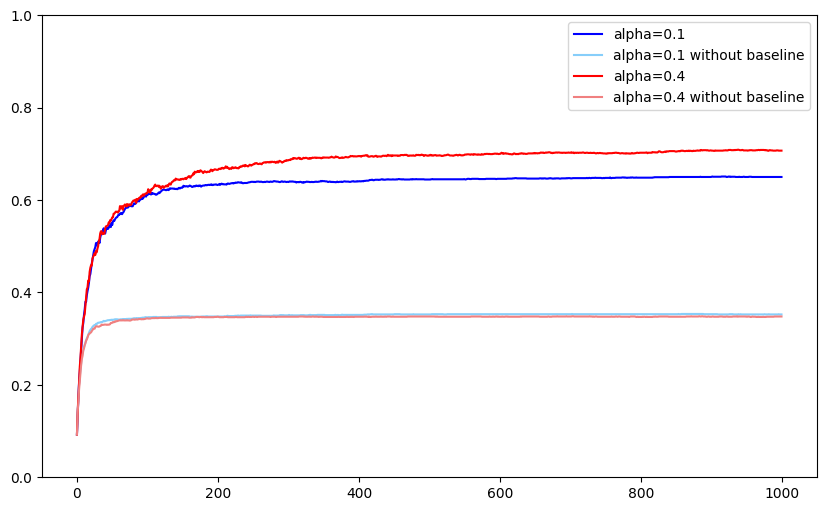

In [21]:
plt.figure(figsize=(10,6))
plt.ylim([0,1])
plt.plot(ac_sft_4_baseline, 'b', label='alpha=0.1')
plt.plot(ac_sft_4, 'lightskyblue', label='alpha=0.1 without baseline')
plt.plot(ac_sft_1_baseline, 'r', label='alpha=0.4')
plt.plot(ac_sft_1, 'lightcoral', label='alpha=0.4 without baseline')
plt.legend()
plt.show()